In [34]:
import pandas as PD
import numpy as NP

In [35]:
df_cont = PD.read_csv("data/cleaned_continuous_normalised.csv")
df_cat = PD.read_csv("data/cleaned_categorical.csv")

In [36]:
df_cont_corr = df_cont.corr()
df_cat_corr = df_cat.corr()

In [37]:
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import rcParams

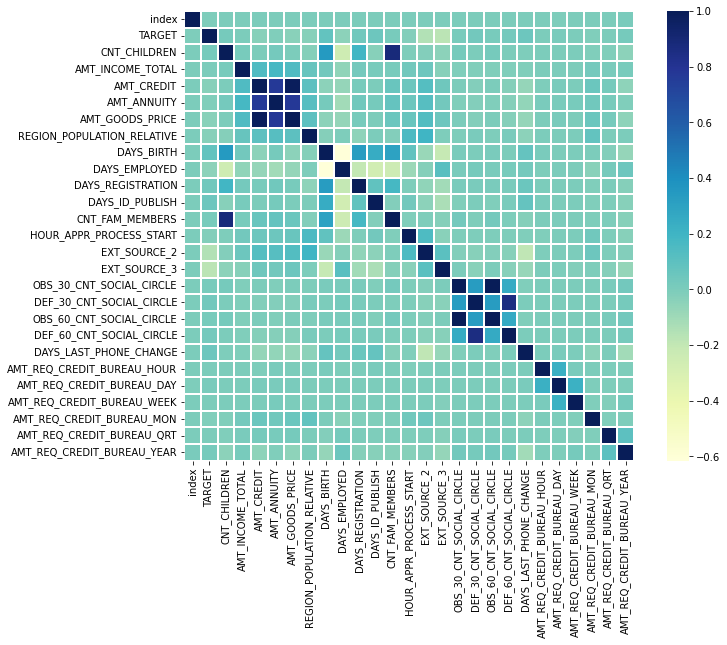

In [38]:
rcParams['figure.figsize'] = 11.7,8.27
sn.heatmap(df_cont_corr, vmin=df_cont_corr.values.min(), vmax=1, square=True, cmap="YlGnBu", linewidths=0.1, annot=False)
plt.show()

In [49]:
# Based on the graph above, remove: CNT_FAM_MEMBERS, AMT_CREDIT, AMT_ANNUITY, OBS_60_CNT_SOCIAL_CIRCLE
print( df_cont_corr["OBS_30_CNT_SOCIAL_CIRCLE"]["TARGET"])
print( df_cont_corr["OBS_60_CNT_SOCIAL_CIRCLE"]["TARGET"])

0.010299780158845973
0.01026540313758457


In [55]:
df_cont.drop(["CNT_FAM_MEMBERS", "AMT_CREDIT", "AMT_ANNUITY", "OBS_60_CNT_SOCIAL_CIRCLE"], inplace=True, axis=1)

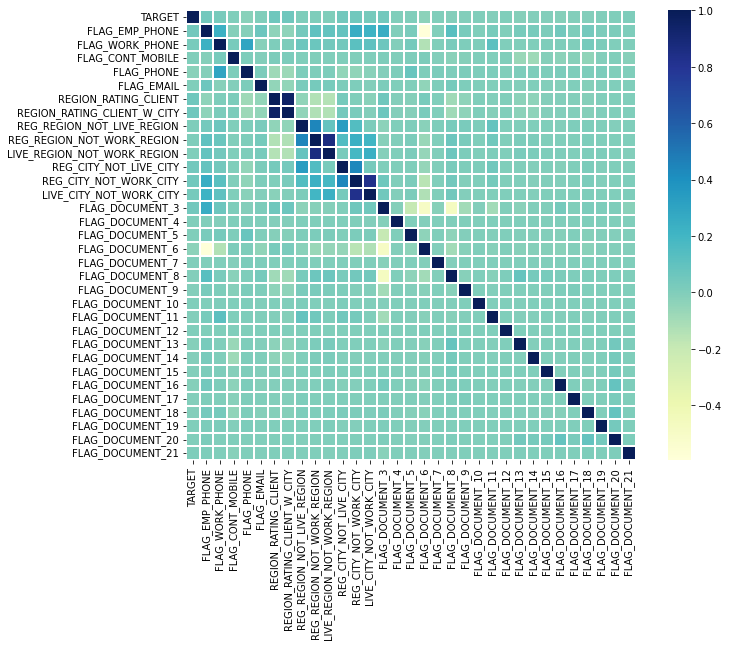

In [40]:
rcParams['figure.figsize'] = 11.7,8.27
sn.heatmap(df_cat_corr, vmin=df_cat_corr.values.min(), vmax=1, square=True, cmap="YlGnBu", linewidths=0.1, annot=False)
plt.show()

In [54]:
# Based on the graph above, remove: REGION_RATING_CLIENT, LIVE_REGION_NOT_WORK_REGION, LIVE_CITY_NOT_WORK_CITY
print( df_cat_corr["REG_CITY_NOT_WORK_CITY"]["LIVE_CITY_NOT_WORK_CITY"])
print( df_cat_corr["REG_CITY_NOT_WORK_CITY"]["TARGET"])
print( df_cat_corr["LIVE_CITY_NOT_WORK_CITY"]["TARGET"])

0.8314136007670155
0.04993580701240059
0.031606405812409


In [58]:
df_cat.drop(["REGION_RATING_CLIENT", "LIVE_REGION_NOT_WORK_REGION", "LIVE_CITY_NOT_WORK_CITY"], inplace=True, axis=1)

In [59]:
df_cat.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

In [60]:
# Manual one hot encoding
df_categorical_final = PD.DataFrame()
for colName in df_cat:
    if colName == "TARGET": 
        df_categorical_final[colName] = df_cat[colName]
        continue
    col = df_cat[colName]
    if col.unique().__len__() == 2 and col.dtype == NP.int64:
        df_categorical_final[colName] = col
        continue
    onehot = PD.get_dummies(df_cat[colName]).rename(lambda x: colName + "_" + str(x), axis= 1)
    df_categorical_final = PD.concat([df_categorical_final, onehot], axis = 1)
df_categorical_final

,TARGET,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244275,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
244276,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
244277,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
244278,1,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df_final = PD.concat([df_cont, df_categorical_final.drop("TARGET", axis=1)], axis = 1)
df_final.drop("index", inplace=True, axis=1)

In [70]:
df_final

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1,0.000000,0.001508,0.077441,0.256321,0.898146,0.045086,0.852140,0.705433,0.434783,...,0,0,0,0,0,0,0,0,0,0
1,0,0.000000,0.000354,0.023569,0.134897,0.351213,0.046161,0.827335,0.648326,0.391304,...,0,0,0,0,0,0,0,0,0,0
2,0,0.000000,0.000623,0.103255,0.491595,0.471327,0.042604,0.798557,0.933722,0.695652,...,0,0,0,0,0,0,0,0,0,0
3,0,0.052632,0.001239,0.337823,0.491595,0.651812,0.038580,0.950835,0.913992,0.695652,...,0,0,1,0,0,0,0,0,0,0
4,0,0.000000,0.002854,0.371493,0.039215,0.362397,0.045577,0.813675,0.669446,0.695652,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244275,0,0.000000,0.000739,0.051627,0.311695,0.760685,0.045707,0.972641,0.453105,0.478261,...,0,0,0,0,0,0,0,0,0,0
244276,0,0.000000,0.000739,0.046016,0.311695,0.046619,1.000000,0.701321,0.672502,0.652174,...,0,0,0,0,0,0,0,0,0,0
244277,0,0.000000,0.001085,0.135802,0.065247,0.584023,0.026076,0.726937,0.284424,0.391304,...,0,0,0,0,0,0,0,0,0,0
244278,1,0.000000,0.001239,0.069585,0.069553,0.755492,0.034258,0.896158,0.870641,0.391304,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_final.to_csv("data/cleaned_final.csv", index=False)